In [1]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 26.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv("/content/Titanic_train.csv")
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
test=pd.read_csv("/content/Titanic_test.csv")
test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

Data Cleaning


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
train.sample(20)

PassengerId  Survived  Pclass  \
220          221         1       3   
88            89         1       1   
197          198         0       3   
217          218         0       2   
368          369         1       3   
60            61         0       3   
323          324         1       2   
41            42         0       2   
212          213         0       3   
634          635         0       3   
644          645         1       3   
623          624         0       3   
755          756         1       2   
237          238         1       2   
195          196         1       1   
828          829         1       3   
723          724         0       2   
111          112         0       3   
764          765         0       3   
858          859         1       3   

                                                  Name     Sex    Age  SibSp  \
220                     Sunderland, Mr. Victor Francis    male  16.00      0   
88                          Fortune, Miss. Mabel Helen  female  23.00      3   
197                   Olsen, Mr. Karl Siegwart Andreas    male  42.00      0   
217                       Jacobsohn, Mr. Sidney Samuel    male  42.00      1   
368                                Jermyn, Miss. Annie  female    NaN      0   
60                               Sirayanian, Mr. Orsen    male  22.00      0   
323  Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...  female  22.00      1   
41   Turpin, Mrs. William John Robert (Dorothy Ann ...  female  27.00      1   
212                             Perkin, Mr. John Henry    male  22.00      0   
634                                 Skoog, Miss. Mabel  female   9.00      3   
644                             Baclini, Miss. Eugenie  female   0.75      2   
623                        Hansen, Mr. Henry Damsgaard    male  21.00      0   
755                          Hamalainen, Master. Viljo    male   0.67      1   
237                   Collyer, Miss. Marjorie "Lottie"  female   8.00      0   
195                               Lurette, Miss. Elise  female  58.00      0   
828                       McCormack, Mr. Thomas Joseph    male    NaN      0   
723                            Hodges, Mr. Henry Price    male  50.00      0   
111                               Zabour, Miss. Hileni  female  14.50      1   
764                             Eklund, Mr. Hans Linus    male  16.00      0   
858              Baclini, Mrs. Solomon (Latifa Qurban)  female  24.00      0   

     Parch           Ticket      Fare        Cabin Embarked  
220      0  SOTON/OQ 392089    8.0500          NaN        S  
88       2            19950  263.0000  C23 C25 C27        S  
197      1             4579    8.4042          NaN        S  
217      0           243847   27.0000          NaN        S  
368      0            14313    7.7500          NaN        Q  
60       0             2669    7.2292          NaN        C  
323      1           248738   29.0000          NaN        S  
41       0            11668   21.0000          NaN        S  
212      0        A/5 21174    7.2500          NaN        S  
634      2           347088   27.9000          NaN        S  
644      1             2666   19.2583          NaN        C  
623      0           350029    7.8542          NaN        S  
755      1           250649   14.5000          NaN        S  
237      2       C.A. 31921   26.2500          NaN        S  
195      0         PC 17569  146.5208          B80        C  
828      0           367228    7.7500          NaN        Q  
723      0           250643   13.0000          NaN        S  
111      0             2665   14.4542          NaN        C  
764      0           347074    7.7750          NaN        S  
858      3             2666   19.2583          NaN        C

Handling the null values

In [12]:
cat_columns_train=train.drop(["PassengerId","Name","Sex","Ticket","Cabin","Embarked"],axis=1)
cat_columns_train

Survived  Pclass   Age  SibSp  Parch     Fare
0           0       3  22.0      1      0   7.2500
1           1       1  38.0      1      0  71.2833
2           1       3  26.0      0      0   7.9250
3           1       1  35.0      1      0  53.1000
4           0       3  35.0      0      0   8.0500
..        ...     ...   ...    ...    ...      ...
886         0       2  27.0      0      0  13.0000
887         1       1  19.0      0      0  30.0000
888         0       3   NaN      1      2  23.4500
889         1       1  26.0      0      0  30.0000
890         0       3  32.0      0      0   7.7500

[891 rows x 6 columns]

In [13]:
cat_columns_test=train.drop(["PassengerId","Name","Sex","Ticket","Cabin","Embarked"],axis=1)
cat_columns_test

Survived  Pclass   Age  SibSp  Parch     Fare
0           0       3  22.0      1      0   7.2500
1           1       1  38.0      1      0  71.2833
2           1       3  26.0      0      0   7.9250
3           1       1  35.0      1      0  53.1000
4           0       3  35.0      0      0   8.0500
..        ...     ...   ...    ...    ...      ...
886         0       2  27.0      0      0  13.0000
887         1       1  19.0      0      0  30.0000
888         0       3   NaN      1      2  23.4500
889         1       1  26.0      0      0  30.0000
890         0       3  32.0      0      0   7.7500

[891 rows x 6 columns]

In [14]:
cat_columns_train["Age"].fillna(cat_columns_train["Age"].mean(), inplace=True)
cat_columns_test["Age"].fillna(cat_columns_test["Age"].mean(),inplace=True)

/tmp/ipython-input-2010980270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_columns_train["Age"].fillna(cat_columns_train["Age"].mean(), inplace=True)
/tmp/ipython-input-2010980270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [15]:
cat_columns_train['Age'] = cat_columns_train['Age'].astype('int64')

In [16]:
cat_columns_test['Age'] = cat_columns_test['Age'].astype('int64')

In [17]:
# train.isnull().sum()

In [18]:
# test.isnull().sum()

In [19]:
cat_columns_train['Fare'].fillna(cat_columns_train['Fare'].mean(), inplace=True)

/tmp/ipython-input-2751047035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_columns_train['Fare'].fillna(cat_columns_train['Fare'].mean(), inplace=True)


In [20]:
cat_columns_test['Fare'].fillna(cat_columns_test['Fare'].mean(), inplace=True)

/tmp/ipython-input-1173093924.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_columns_test['Fare'].fillna(cat_columns_test['Fare'].mean(), inplace=True)


In [21]:
cat_columns_train.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [22]:
cat_columns_test.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [23]:
z=cat_columns_train.corr(numeric_only=True)
z

Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.067809 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.335071  0.083081  0.018443 -0.549500
Age      -0.067809 -0.335071  1.000000 -0.232743 -0.176744  0.093856
SibSp    -0.035322  0.083081 -0.232743  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.176744  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.093856  0.159651  0.216225  1.000000

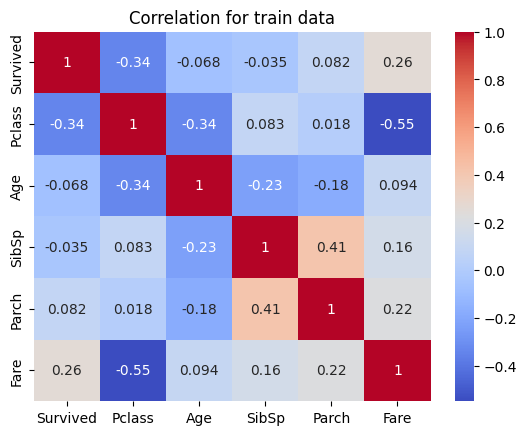

In [25]:
sns.heatmap(z, annot=True,cmap="coolwarm")
plt.title("Correlation for train data")
plt.show()

In [26]:
xyz=cat_columns_test.corr(numeric_only=True)
xyz

Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.067809 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.335071  0.083081  0.018443 -0.549500
Age      -0.067809 -0.335071  1.000000 -0.232743 -0.176744  0.093856
SibSp    -0.035322  0.083081 -0.232743  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.176744  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.093856  0.159651  0.216225  1.000000

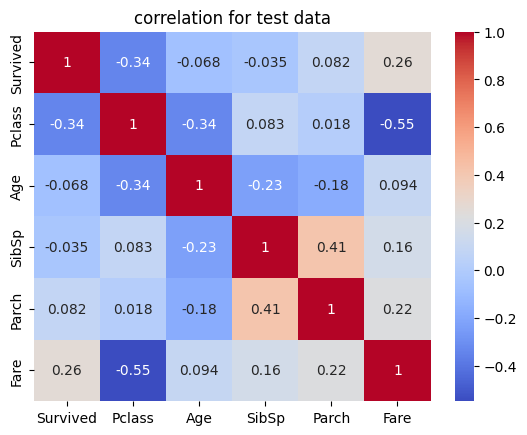

In [29]:
sns.heatmap(xyz, annot=True,cmap="coolwarm")
plt.title("correlation for test data")
plt.show()

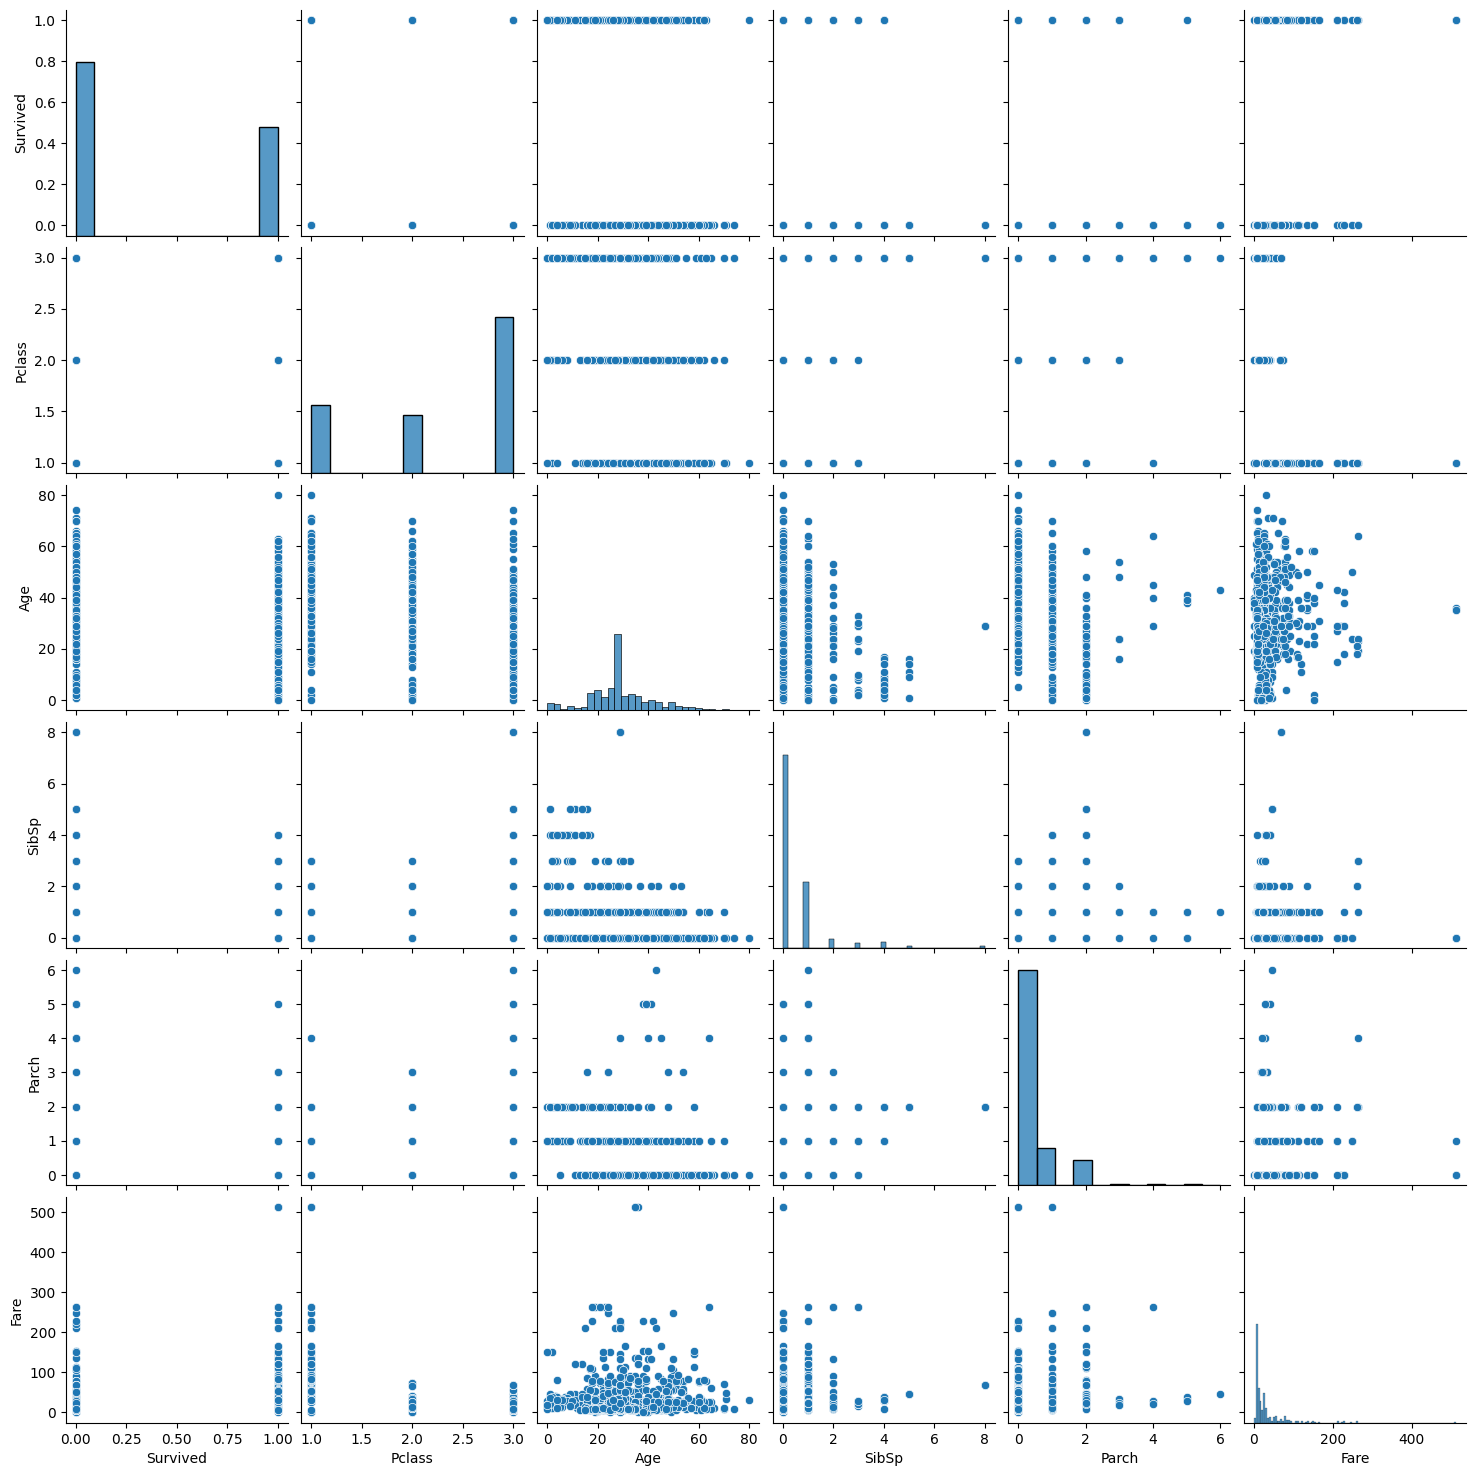

In [30]:
sns.pairplot(cat_columns_train)

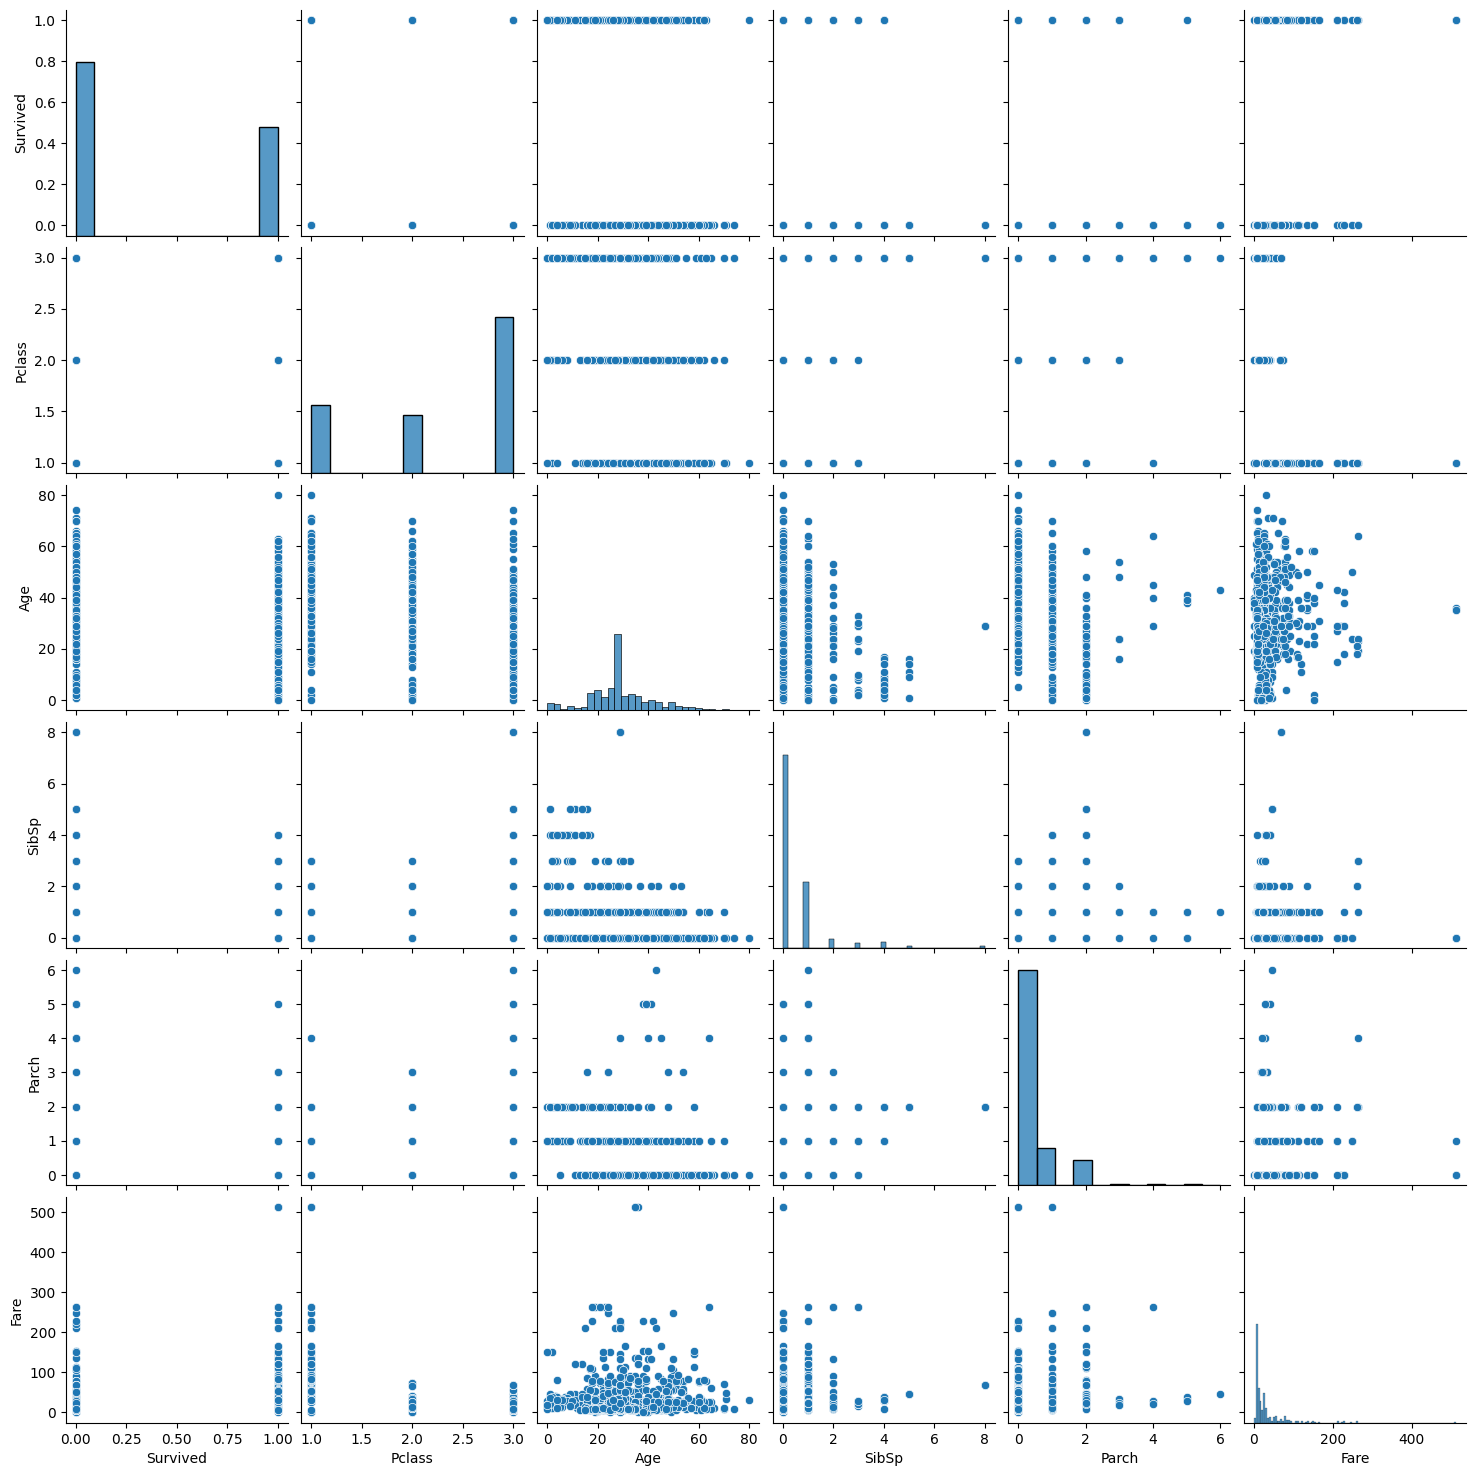

In [31]:
sns.pairplot(cat_columns_test)

In [32]:
df=pd.concat([cat_columns_train,cat_columns_test],sort=True).reset_index(drop=True)
df

Age     Fare  Parch  Pclass  SibSp  Survived
0      22   7.2500      0       3      1         0
1      38  71.2833      0       1      1         1
2      26   7.9250      0       3      0         1
3      35  53.1000      0       1      1         1
4      35   8.0500      0       3      0         0
...   ...      ...    ...     ...    ...       ...
1777   27  13.0000      0       2      0         0
1778   19  30.0000      0       1      0         1
1779   29  23.4500      2       3      1         0
1780   26  30.0000      0       1      0         1
1781   32   7.7500      0       3      0         0

[1782 rows x 6 columns]

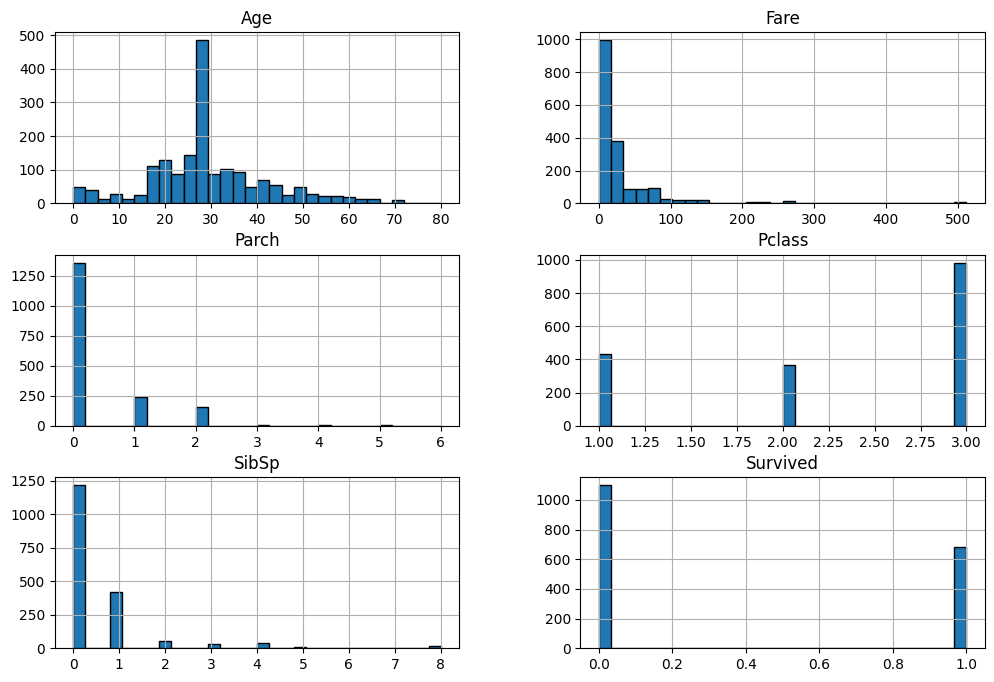

In [33]:
df.hist(bins=30, figsize=(12,8),edgecolor="black")
plt.show()

In [34]:
df = df.dropna(subset=['Survived'])

In [35]:
df

Age     Fare  Parch  Pclass  SibSp  Survived
0      22   7.2500      0       3      1         0
1      38  71.2833      0       1      1         1
2      26   7.9250      0       3      0         1
3      35  53.1000      0       1      1         1
4      35   8.0500      0       3      0         0
...   ...      ...    ...     ...    ...       ...
1777   27  13.0000      0       2      0         0
1778   19  30.0000      0       1      0         1
1779   29  23.4500      2       3      1         0
1780   26  30.0000      0       1      0         1
1781   32   7.7500      0       3      0         0

[1782 rows x 6 columns]

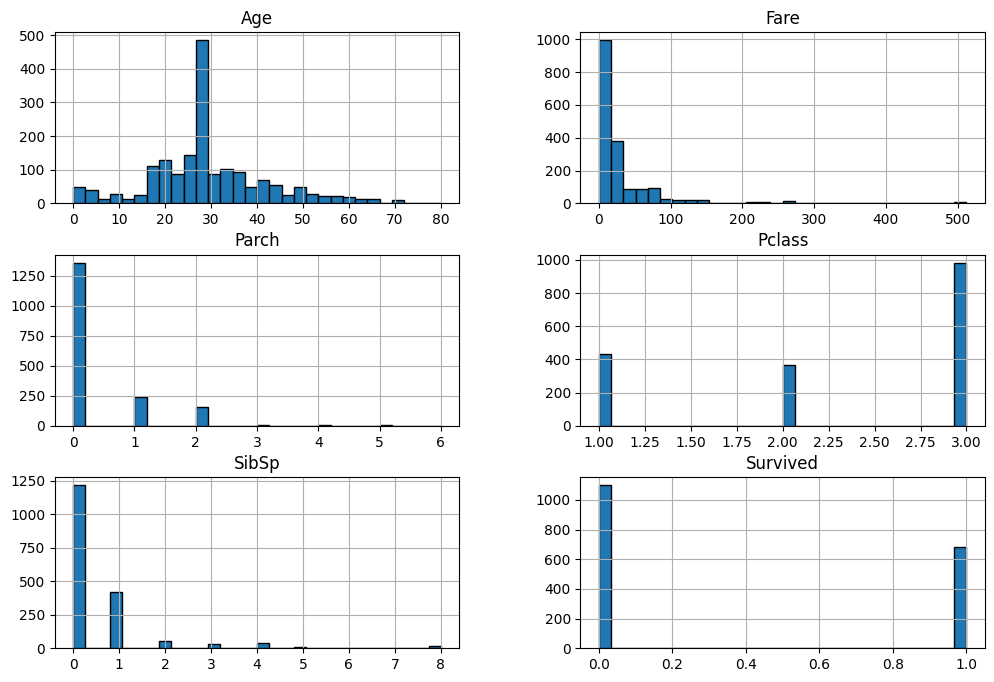

In [36]:
df.hist(bins=30,figsize=(12,8),edgecolor="Black")
plt.show()

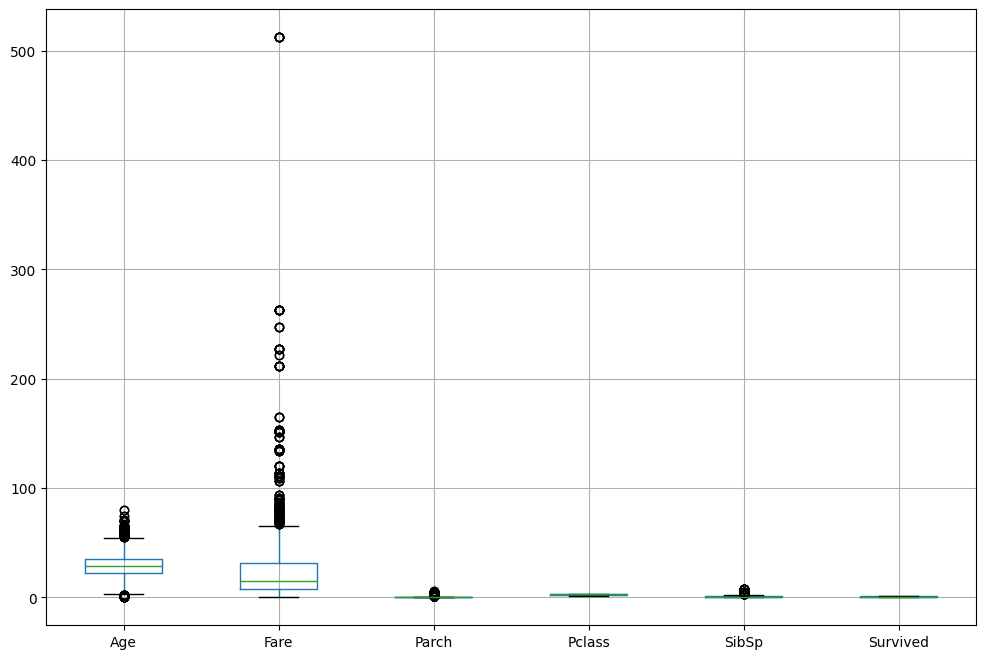

In [37]:
df.boxplot(figsize=(12,8))
plt.show()

In [38]:
df.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived'], dtype='object')

Treating Outliers

In [49]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Age'] >= (Q1 - 1.5 * IQR)) & (df['Age'] <= (Q3 + 1.5 * IQR))]

In [56]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Fare'] >= (Q1 - 1.5 * IQR)) & (df['Fare'] <= (Q3 + 1.5 * IQR))]

In [51]:
Q1 = df['Parch'].quantile(0.25)
Q3 = df['Parch'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Parch'] >= (Q1 - 1.5 * IQR)) & (df['Parch'] <= (Q3 + 1.5 * IQR))]

In [52]:
Q1 = df['Pclass'].quantile(0.25)
Q3 = df['Pclass'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Pclass'] >= (Q1 - 1.5 * IQR)) & (df['Pclass'] <= (Q3 + 1.5 * IQR))]

In [53]:
Q1 = df['SibSp'].quantile(0.25)
Q3 = df['SibSp'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['SibSp'] >= (Q1 - 1.5 * IQR)) & (df['SibSp'] <= (Q3 + 1.5 * IQR))]

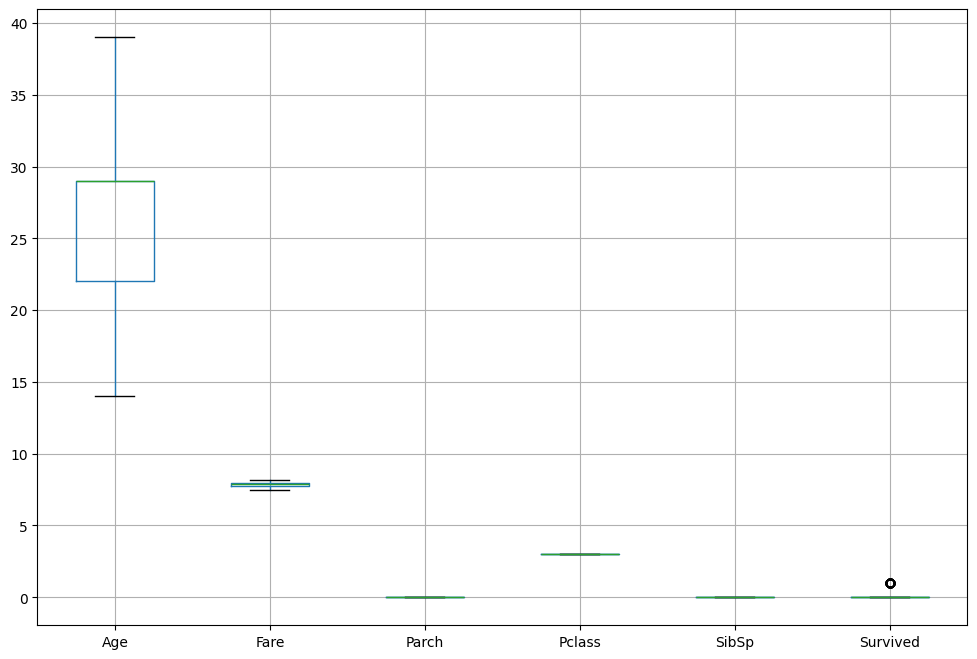

In [57]:
df.boxplot(figsize=(12,8))
plt.show()

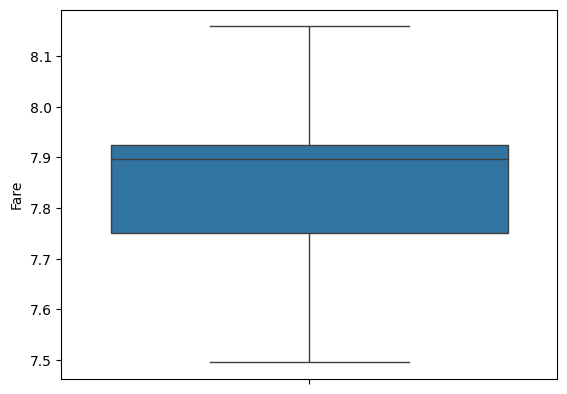

In [58]:
sns.boxplot(df["Fare"])
plt.show()

In [59]:
x = cat_columns_train.drop("Survived", axis=1)
y = cat_columns_test["Survived"]

In [60]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
x=model.fit_transform(x)
x

array([[ 0.82737724, -0.58004441,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.65011226,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.27250525, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724, -0.04185087,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.27250525, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.18880351, -0.4745452 , -0.47367361, -0.49237783]])

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x,y)

LogisticRegression()

In [88]:
y_pred=LR.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0])

In [89]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [90]:
ac=accuracy_score(y_test, y_pred)
ac

0.7430167597765364

In [91]:
print(confusion_matrix(y_test, y_pred))

[[94 11]
 [35 39]]


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       105
           1       0.78      0.53      0.63        74

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.72       179
weighted avg       0.75      0.74      0.73       179



In [93]:
print(roc_auc_score(y_test,y_pred))

0.7111325611325611


In [94]:
print(roc_curve(y_test,y_pred))

(array([0.       , 0.1047619, 1.       ]), array([0.        , 0.52702703, 1.        ]), array([inf,  1.,  0.]))


/tmp/ipython-input-2884565636.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


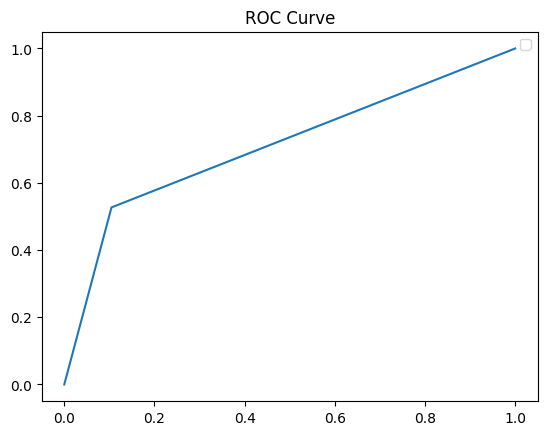

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.legend()
plt.show()

In [96]:
y_pred1=LR.predict(x_train)
y_pred1

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,

In [97]:
print(accuracy_score(y_train,y_pred1))

0.6966292134831461


In [98]:
print(confusion_matrix(y_train, y_pred1))

[[380  64]
 [152 116]]


In [99]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       444
           1       0.64      0.43      0.52       268

    accuracy                           0.70       712
   macro avg       0.68      0.64      0.65       712
weighted avg       0.69      0.70      0.68       712



In [100]:
print(roc_auc_score(y_train,y_pred1))

0.6443458383756892


In [101]:
print(roc_curve(y_test,y_pred))

(array([0.       , 0.1047619, 1.       ]), array([0.        , 0.52702703, 1.        ]), array([inf,  1.,  0.]))


/tmp/ipython-input-487808155.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


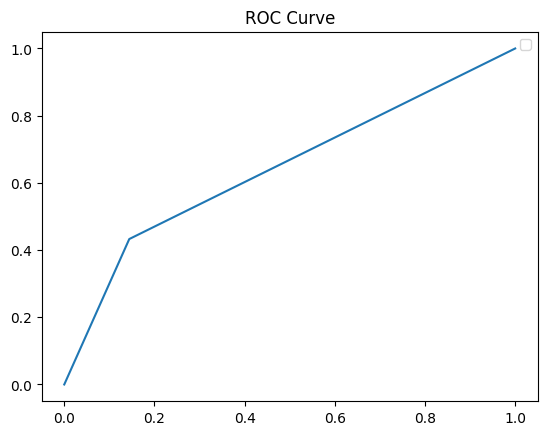

In [102]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred1)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.legend()
plt.show()

In [103]:
coefficients = LR.coef_[0]
coefficients

array([-0.77418995, -0.49078916, -0.26001628,  0.17540852,  0.23135093])

In [118]:
import pickle
pickle.dump(LR, open("LR.pkl", "wb"))

print("✅ Model saved as LR.pkl")

✅ Model saved as LR.pkl


In [122]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np
# Load Trained Logistic Regression Model

model = pickle.load(open("LR.pkl", "rb"))

st.title("📊 Logistic Regression Prediction App")
st.write("This app predicts outcomes using your trained Logistic Regression model.")

st.header("Enter Feature Values:")

f1 = st.number_input("Feature 1", value=0.0)
f2 = st.number_input("Feature 2", value=0.0)
f3 = st.number_input("Feature 3", value=0.0)
f4 = st.number_input("Feature 4", value=0.0)
f5 = st.number_input("Feature 5", value=0.0)

input_data = np.array([[f1, f2, f3, f4, f5]])

if st.button("Predict"):
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    st.subheader("Prediction Result")
    if prediction == 1:
        st.success(f"✅ Positive Class (Probability: {probability:.2f})")
    else:
        st.error(f"❌ Negative Class (Probability: {probability:.2f})")

Overwriting app.py


In [123]:
!wget  -q -o - ipv4.canhanzip.com

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.7.81:8501

⠦⠧⠇⠏⠋⠙your url is: https://better-moments-sniff.loca.lt


Interview Questions:

1. What is the difference between precision and recall?

Ans:
   
   - Precision and Recall are Performance for positive class detection
   

2. What is cross-validation, and why is it important in binary      classification?

Ans:

   - Cross-validation is a resampling technique used to evaluate the performance of a machine learning model.
   - It prevents the overfiting